# Showing some raw information about a corpus

This notebook:
1. Shows how to display the size of the thalamus corpus
2. Lists examples of annotations (not necessarily related to parameters) 
3. Displays a histogram of the most annotated parameter types 
4. Lists the text annotations with their surrounding text (context) for the most annotated parameters

### Download/updating the annotation corpus

In [1]:
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

### Loading annotations manually directly from .pcr files.

In [2]:
from glob import glob

from nat.annotation import Annotation
from nat.treeData import flatten_list

annotations = []
for fileName in glob(repo_dir + "/*.pcr"):
    try:
        annotations.extend(Annotation.readIn(open(fileName, "r", encoding="utf-8", errors='ignore')))
    except:       
        print("Skipping: ", fileName)    
        raise

### Showing corpus size

In [3]:
import pandas as pd
import numpy as np
from IPython.display import HTML 

html = pd.DataFrame({"Nb. annotations" : [len(annotations)],
              "Nb. papers"      : [len(np.unique([annot.pubId for annot in annotations]))],
              "Nb. parameters"  : [len(flatten_list([[(param, annot) for param in annot.parameters]  
                                                     for annot in annotations]))]}).to_html(index=False)
HTML(html)

Nb. annotations,Nb. papers,Nb. parameters
582,113,485


### Showing example of annotations (first five only)

In [4]:
annotData = {"Type":[], "Nb. of param.":[], "Text":[]}
for annot in annotations:
    annotData["Type"].append(annot.type)
    annotData["Nb. of param."].append(len(annot.parameters))
    annotData["Text"].append(annot.text)
annotData = pd.DataFrame(annotData)

In [5]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000
html = annotData.head(5).to_html(index=False)
HTML(html)

Nb. of param.,Text,Type
0,"Thalamic\ncells in higher-order nuclei have higher propensities to discharge in\nburst as compared with those in first-order nuclei (He & Hu, 2002;\nRamcharan et al., 2005; Wei et al., 2011).",text
0,"Note that some of the\naction potentials in cells exhibiting spikelets (Fig. 12C) were\ninflected on the rising phase, suggesting an antidromic origin,\nas would be expected if some of the bursting activity involves\nan electrically coupled network of pyramidal cell axons (Cun-\nningham et al. 2004a).",text
0,"sustained firing of layer 4 spiny stellate neurons, and\nlayer 4 VFO, can occur in the model under at least 2 condi-\ntions: 1) high-conductance AMPA receptors at connections\nbetween layer 4 spiny stellates (Figs. 7B and 8), or 2) lower\nconductance AMPA receptors, together with rapid-time-\ncourse, relatively voltage-independent NMDA receptors, at\nconnections between spiny stellate cells",text
0,"Deficits in EEG s power were also detected in a mouse\nlacking the Ca V 3.1 isoform [22], the only T channel subtype\nexpressed in relay neurons [15].",text
0,"Another important factor in the generation and maintenance of reticular intrinsic oscillations is the aforementioned SK2 or Kcnn2 channel. The vigorous Ca 2+ influx in nRt dendrites originating from Ca V 3.3 channels gates SK2 channels, thereby creating a burst afterhyperpolarization (bAHP) [12,19]. As T channels recover partially from inactivation during bAHPs, nRt cells typically generate a series of low-threshold bursts, with a rhythmicity also seen in nRt of sleeping animals [20,21]. In SK2 À/À mice, this oscillatory discharge is replaced by a single burst followed by a slowly decaying plateau potential [10], demonstrating that the cyclical Ca V 3.3–SK2 channel interaction is necessary for nRt rhythmicity. Conversely, genetic overexpression of SK2 channels resulted in increased bAHPs and prolonged cycles of repetitive bursting [13].\n",text


### Showing a histogram of annotated parameters

In [6]:
parameters = flatten_list([annot.parameters for annot in annotations])

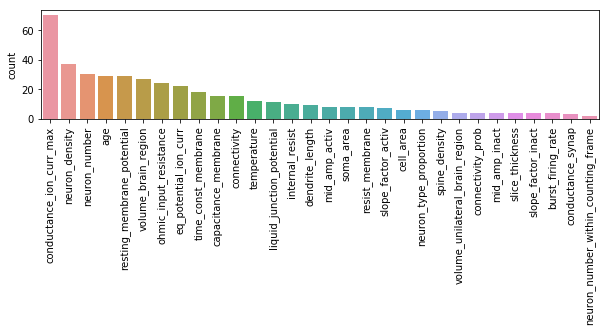

In [7]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from nat.modelingParameter import getParameterTypeNameFromID

plt.figure(figsize=(10, 2))

paramTypes = pd.Series([param.typeId for param in parameters])

axes = sb.countplot(paramTypes, orient='h',
                    order=paramTypes.value_counts().iloc[:30].index)

#plt.xticks(plt.xticks(), plt.gca().get_xticklabels(), rotation='vertical')
paramNames = [getParameterTypeNameFromID(typeId.get_text()) for typeId in axes.get_xticklabels()]
axes.set_xticklabels(paramNames, rotation='vertical')
pass

plt.savefig("annotatedParamHist.png", bbox_inches='tight', dpi=300)

### Printing information for the most annotated parameters

In [8]:
from nat.annotationSearch import ParameterSearch, ConditionAtom

parameters = flatten_list([annot.parameters for annot in annotations])        
paramTypes = pd.Series([param.typeId for param in parameters])
paramNames = [getParameterTypeNameFromID(typeId) for typeId in paramTypes.value_counts().iloc[:5].index]

for paramName in paramNames:
    print("PARAMETER NAME:", paramName)
    searcher = ParameterSearch(repo_dir)
    searcher.setSearchConditions(ConditionAtom("Parameter name", paramName))
    searcher.expandRequiredTags = True
    searcher.onlyCentralTendancy = False
    searcher.contextLength       = 200
    resultDF = searcher.search()
    no = 0
    for _, row in resultDF.iterrows():
        if row["obj_annotation"].type == "text":
            no += 1
            print("Number: ", no)
            print("Text: ", row["Text"].replace("\n", " "))
            print("Context: ", row["Context"].replace("\n", " "))
            print("Values: ", row["Values"])
            print("Unit: ", row["Unit"])
            print(" ")

PARAMETER NAME: conductance_ion_curr_max
Number:  1
Text:  The gCAN had a conductance of 250S/cm2
Context:  150 ␮s/cm 2, and gH had a reversal potential of ⫺45 mV and peak conductance of 150 ␮s/cm 2. T-type Ca2⫹ channels ( gT) were modeled with a reversal potential of 120 mV and a permeability of 0.7 ␮m/s. The gCAN had a conductance of 250 ␮S/cm 2 and reversal potential of ⫺20 mV. The gKIR and the fast voltage-gated potassium channel ( gKf) had conductances of 20 ␮s/ cm 2 and 50 mS/cm 2, respectively. Both potassium channels had reversal pot
Values:  250.0
Unit:  uS/cm^2
 
Number:  2
Text:  In thalamocortical cells, in particular, a maximal I h conductance of 10–40 nS was found with a sharp electrode 33
Context:  onditions of lower input resistance. The maximal conductance of Ih in interneurons appears to be smaller than that described in other cell types, where values of 2–10 nS have generally been reported. In thalamocortical cells, in particular, a maximal Ih conductance of 10–40 n

Number:  1
Text:  overall density of neurons in the dLGN of 5,434±326 cells/mm2
Context:  sion of calbindin-D28K (CB), calretinin (CR) and parvalbumin (PV) were performed on dLGN slices (60 lm thick sections from 14to 21-day-old rats). Alternate sections were Nissl-stained and revealed an overall density of neurons in the dLGN of 5,434±326 cells/mm2 (measured in six slices from three animals). Western blot analysis of dLGN tissue using a CBspeciﬁc antibody revealed a band of 28 kDa present throughout postnatal development (Fig. 3A). In dLGN slic
Values:  5434.0 +/- 326.0  (n=6.0)
Unit:  1/mm^2
 
Number:  2
Text:  The total volume of this part of vibrissal thalamus (i.e., convex hull around 24 barreloids; Materials and Methods) was 0.19 ± 0.03 mm 3 , resulting in an average neuron density across the entire VPM of 52,494 ± 5,082 mm −3 . Densities in VPM within and above/below barreloids (51,507 ± 4,422 and 54,440 ± 6,559 mm −3 , respectively) were larger compared with the sur- rounding t

Number:  1
Text:  According to stereological determinations, the number of PV-IR neurons in the RTN in a young adult rat was 14,700
Context:  the profiles of PV-immunonegative structures (nuclei + dendritic bulbs): that of neuronal nuclei varied between 5 mm2 and 84 mm2, while those of the dendritic bulbs varied between 68 mm2 and 101 mm2. According to stereological determinations, the number of PV-IR neurons in the RTN in a young adult rat was 14,700, while that of PVIR calyciform endings was 2040. In several cases it could be observed that perikarya of PVIR nerve cells were directly continuous with calyciform terminals. In such cases, the perika
Values:  14700.0
Unit:  dimensionless
 
Number:  2
Text:  No changes in the total number of nRt neurons were found (mean +/- SEM); GAERS = (30.5 +/- 2.4)*10^3 and controls = (31.7 +/- 2.0)*10^3
Context:  d using optical fractionator in the CAST-Grid system (Olympus, DK). The total number of neocortical neurons was then calculated using the fo

Number:  1
Text:  The resting potential of the relay cells 71.4 +/- 3.1 mV, and that of the interneurons was 69.1+/-  3.6 mV.
Context:  brane timeconstant (101.2&19.3 vs 22.5&7.1 MD). These characteristics alone were sufficient to distinguish unambiguously the two cell types prior to subsequent morphological confirmation (see below). The resting potential of the relay cells "71.4&3.1 mV, and that of the interneurons was "69.1&3.6 mV. The morphology of nine relay cells and all 11 interneurons was recovered in subsequent histological processing, and in each case, the physiologicallydetermined classification was confirmed (cf. Refs 11, 14
Values:  -69.1 +/- 3.6  (n=11.0)
Unit:  mV
 
Number:  2
Text:  Resting membrane potential (RMP) in the interneurons was -67.7 +/- 5.1 mV
Context:  both about five times higher than those seen in geniculate TC cells (118.7 ^ 45.7 MV and 22.5 ^ 7.1 ms; see Zhu and Uhlrich 90) and four to five times higher than reported previously in interneurons. Resting m